## Business Problem 

This project conducts a comprehensive data analysis and develop a predictive model for customer churn using data from a multi-national bank. The objective is to identify factors contributing to attrition and predict high-risk users, ultimately informing data-driven strategies for product and marketing optimization.

This project delivers: 1) a comprehensive data analysis and visualization report on customer churn at the multi-national bank to provide insights; 2) a machine learning model (random forest) for accurate churn prediction; and 3) data-driven business recommendations to minimize customer attrition and enhance product and marketing effectiveness.


## Outline of Notebook 

    1. Data Analysis and Data Visualization
    2. Machine Learning Modeling (Random Forest) for Churn Prediction
    3. Data Insights and Business Recommendations


## Data Analysis and Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# data: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data 
data = pd.read_csv('.../Bank_Customer_Churn_Prediction.csv')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check for null values
print(data.isnull().sum())

# Check for duplicate rows
data.drop_duplicates()

# describe the basic statistical properties of the columns with numerical data
data.drop(columns=['customer_id'],inplace=True)
data.describe() 

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

### Analyzing Various Features for Churn Prediction

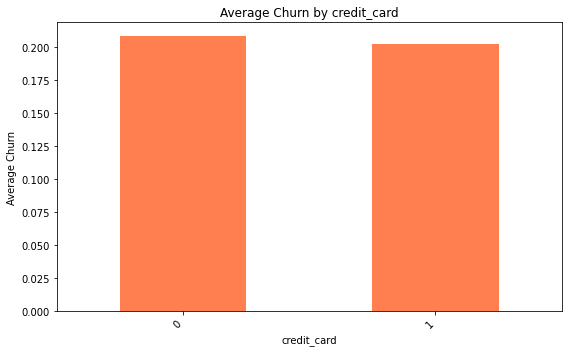

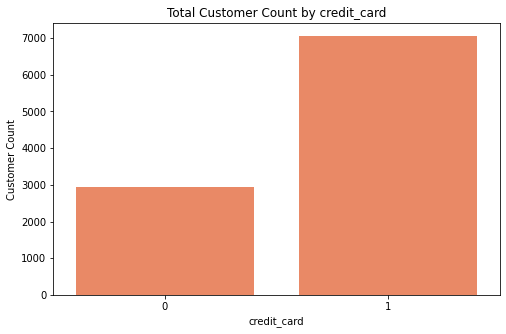

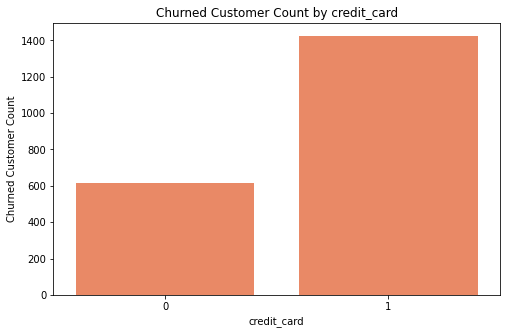

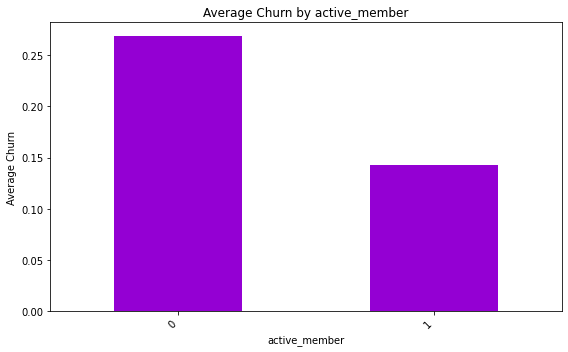

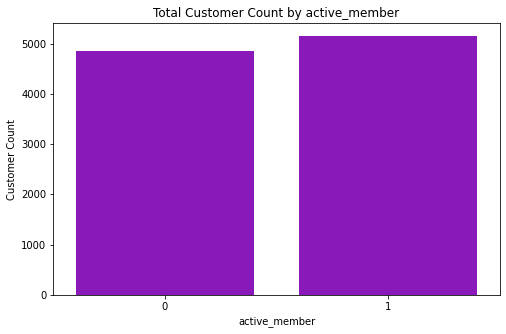

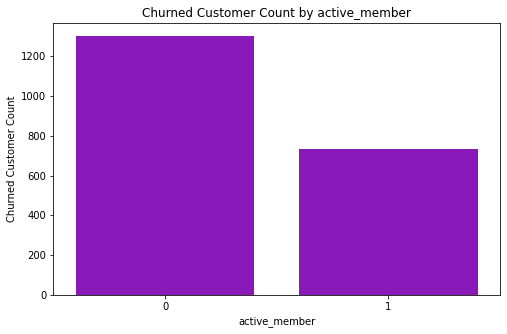

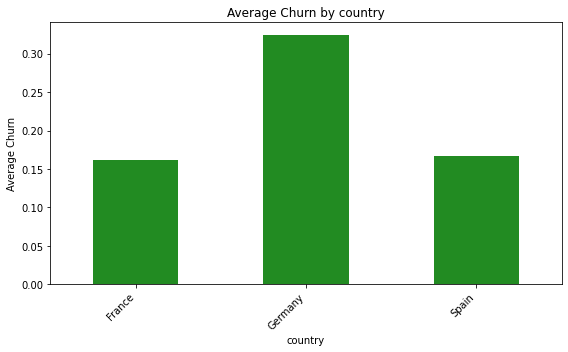

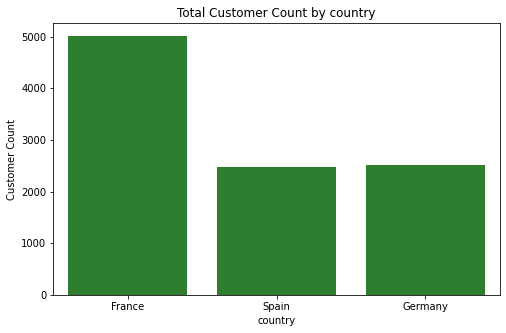

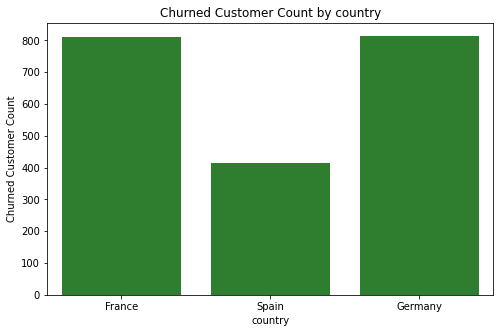

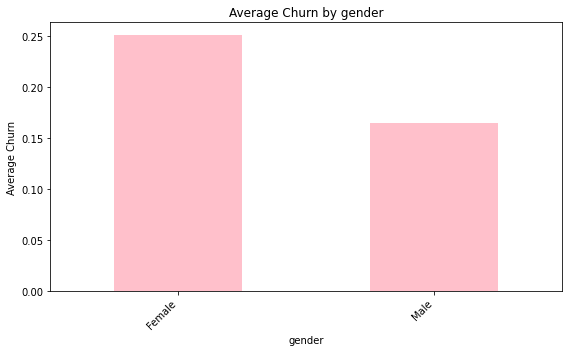

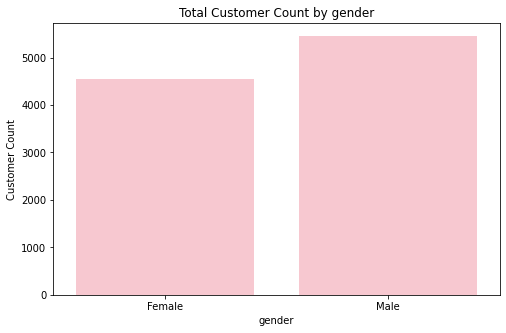

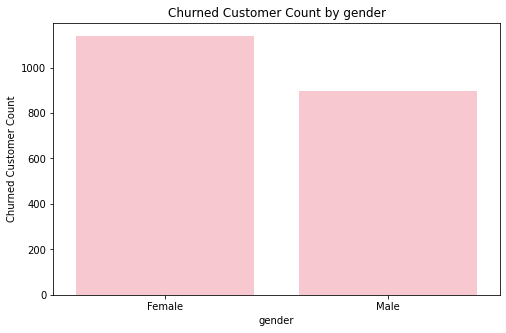

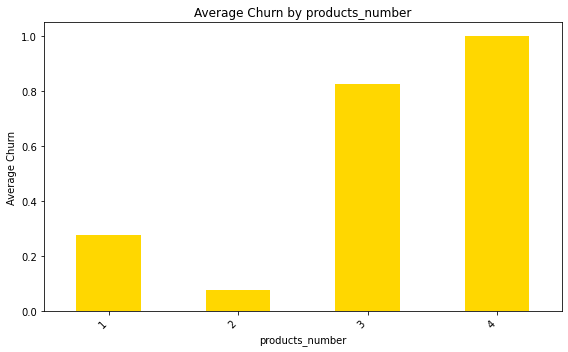

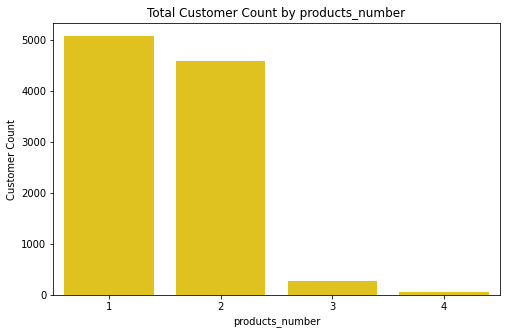

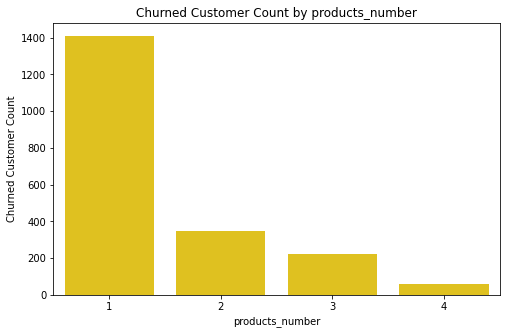

In [6]:
# EDA and data visualizations for the categorical features 

columns_with_categorical_data = ['credit_card', 'active_member', 'country', 'gender', 'products_number']
color_list = ['coral', 'darkviolet', 'forestgreen', 'pink', 'gold']
churned_df = data[data['churn'] == 1]

for i in range(len(columns_with_categorical_data)):
    label = columns_with_categorical_data[i]
    c = color_list[i]
    l = len(data[label].value_counts().index)

    # plot average churn rate for each category
    plt.figure(figsize=(8, 5))
    data.groupby(label)['churn'].mean().plot.bar(color=c)
    plt.title('Average Churn by '+label)
    plt.xlabel(label)
    plt.ylabel('Average Churn')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # plot total customer count for each category
    plt.figure(figsize=(8, 5))
    sns.countplot(x=label, data=data, color=c)
    plt.title('Total Customer Count by ' + label)
    plt.ylabel('Customer Count')
    plt.show()
    
    # plot total churned customer count for each category
    plt.figure(figsize=(8, 5))
    sns.countplot(x=label, data=churned_df, color=c)
    plt.title('Churned Customer Count by ' + label)
    plt.ylabel('Churned Customer Count')
    plt.show()
    


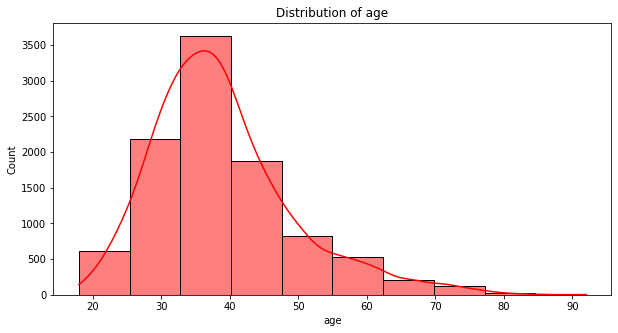

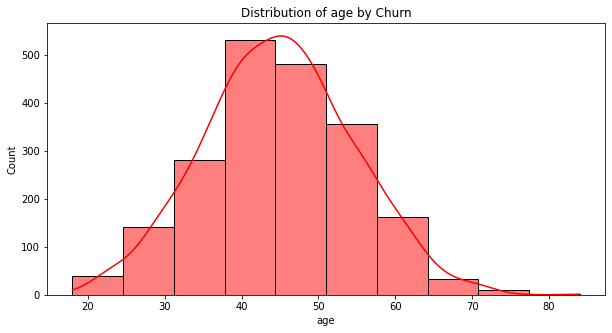

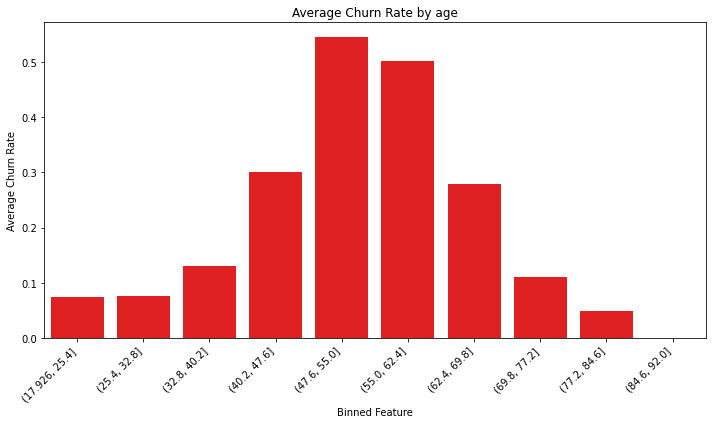

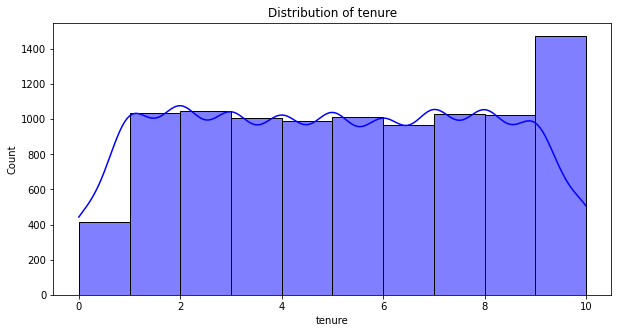

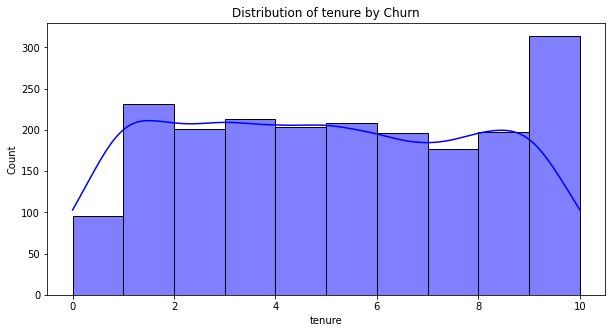

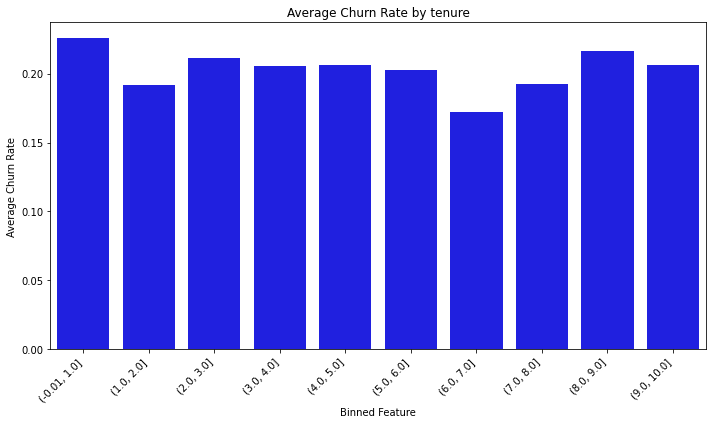

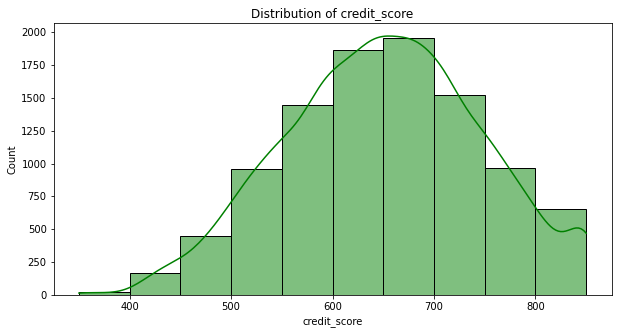

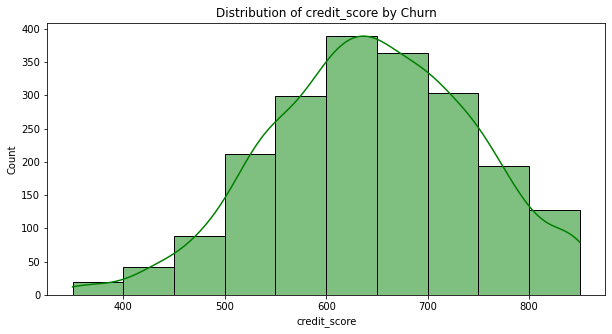

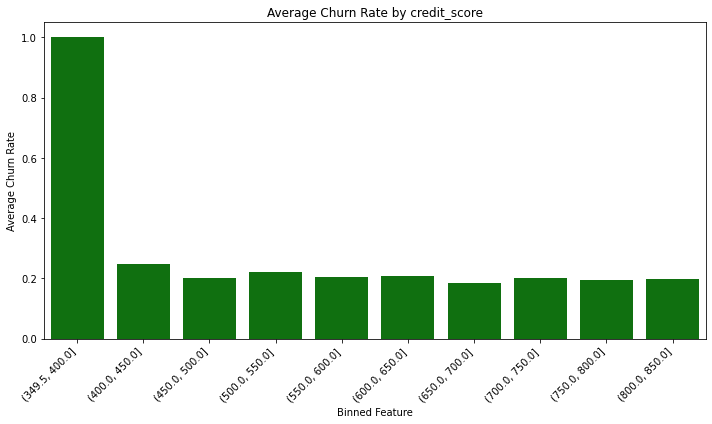

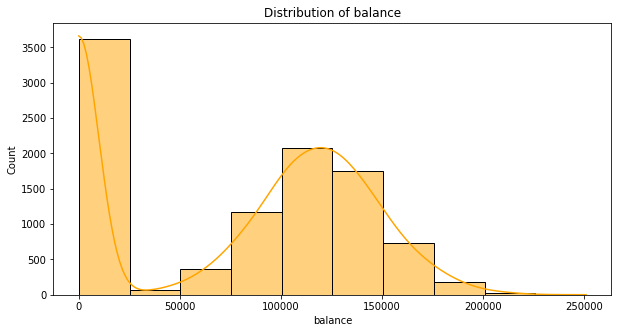

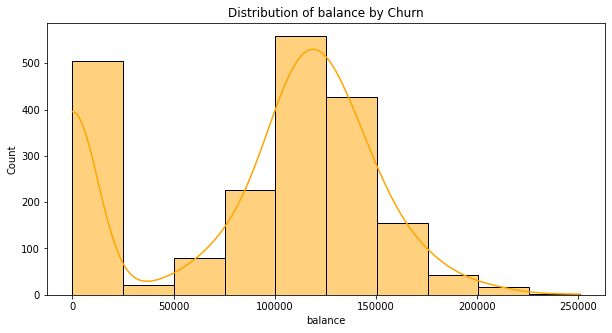

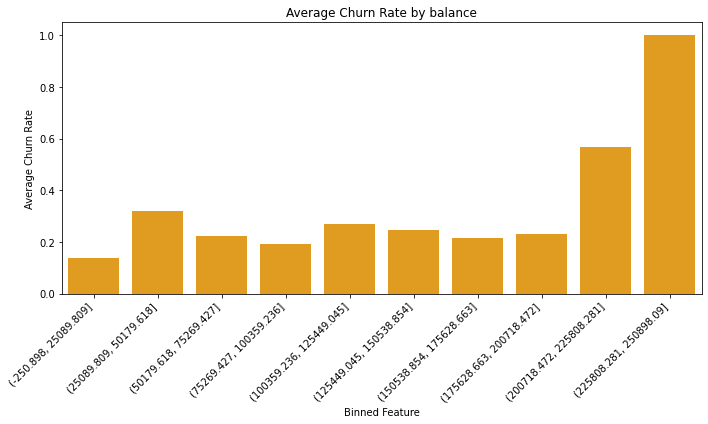

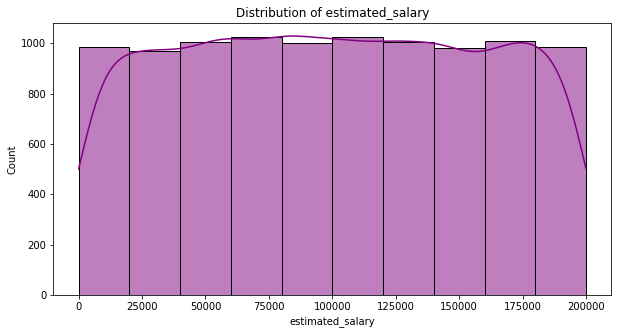

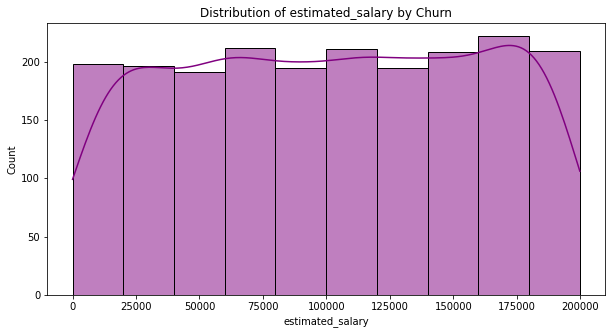

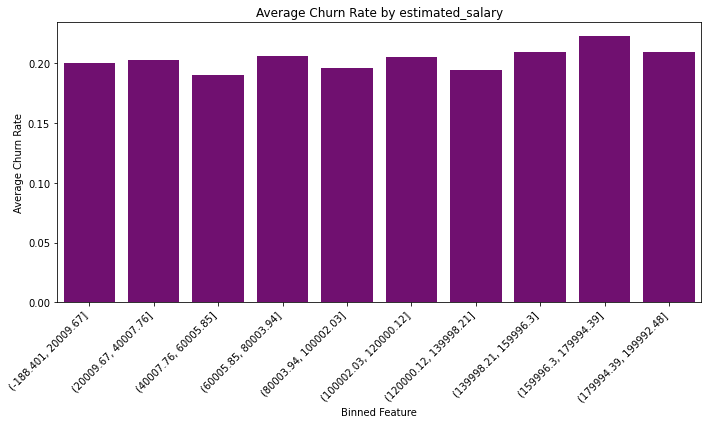

In [7]:
# EDA and data visualizations for the continuous features

columns_with_continuous_data = ['age', 'tenure', 'credit_score', 'balance', 'estimated_salary']
color_list2 = ['red', 'blue', 'green', 'orange', 'purple']

for j in range(len(columns_with_categorical_data)):
    label= columns_with_continuous_data[j]
    c = color_list2[j]
    
    # plot the histogram for the continuous feature vs the count of customers 
    plt.figure(figsize=(10, 5))
    sns.histplot(data[label], bins=10, kde=True, color=c)
    plt.title('Distribution of ' + label)
    plt.show()
    
    # plot the histogram for the continuous feature vs the count of churned customers 
    plt.figure(figsize=(10, 5))
    sns.histplot(data[label][data['churn'] == 1], bins=10, kde=True, color=c)
    plt.title('Distribution of ' + label+ ' by Churn')
    plt.show()
    
    # plot the binned continuous feature vs the average churn 
    num_bins = 10 
    data['binned_feature'] = pd.cut(data[label], bins=num_bins)
    mean_churn_by_bin = data.groupby('binned_feature')['churn'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='binned_feature', y='churn', data=mean_churn_by_bin, color=c)
    plt.title('Average Churn Rate by ' + label)
    plt.xlabel('Binned Feature')
    plt.ylabel('Average Churn Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

data.drop(columns=['binned_feature'],inplace=True)

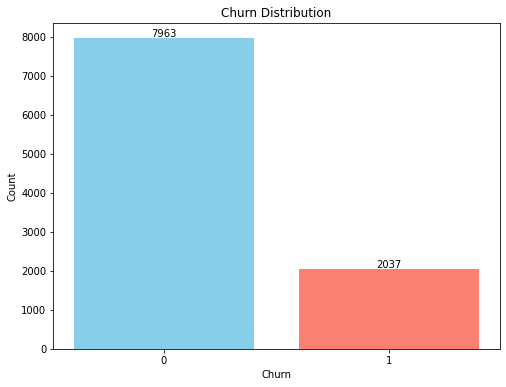

In [8]:
# Plot the churn distribution
churn_counts = data['churn'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon']) #colors can be changed
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks(churn_counts.index)  
for index, value in enumerate(churn_counts.values): #Add the count on top of each bar
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


## Machine Learning Modeling

### Model Training and Evaluation

In [9]:
# deal with columns with categorical data

data_dummy = pd.get_dummies(data, drop_first=False).astype(int)

data_dummy.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


In [10]:
np.random.seed(4684)
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)

In [11]:
np.random.seed(4684)

#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)

#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, random_state=100)
rf.fit(train.drop('churn', axis=1), train['churn'])



RandomForestClassifier(max_features=3, oob_score=True, random_state=100)

In [12]:
# Model evaluation --- print OOB accuracy, confusion matrix for the training dataset 

cm = pd.DataFrame(confusion_matrix(train['churn'], rf.oob_decision_function_[:,1].round(), labels=[0, 1])) 
cm_normalized = cm/len(train)

print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
cm,
"\n",
"OOB Normalized Confusion Matrix", 
"\n",
cm_normalized
)

OOB accuracy is 0.8619487801181998 
 OOB Confusion Matrix 
       0    1
0  5058  204
1   707  630 
 OOB Normalized Confusion Matrix 
           0         1
0  0.766480  0.030914
1  0.107137  0.095469


In [13]:
# Model evaluation --- print test accuracy and confusion matrix for the testing dataset 

cm2 = pd.DataFrame(confusion_matrix(test['churn'], rf.predict(test.drop('churn', axis=1)), labels=[0, 1]))
cm2_normalized = cm2/len(test)

print(
"Test accuracy is", rf.score(test.drop('churn', axis=1),test['churn']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
cm2, 
"\n",
"Test Set Normalized Confusion Matrix", 
"\n",
cm2_normalized
)

Test accuracy is 0.8532784475154367 
 Test Set Confusion Matrix 
       0    1
0  2593  108
1   391  309 
 Test Set Normalized Confusion Matrix 
           0         1
0  0.762423  0.031755
1  0.114966  0.090856


The model's OOB accuracy is around 86% (with 10.7% false negatives and 3.1% false positives). The model's test accuracy is around 85% (with 11.5% false negatives and 3.2% false positives). 

### Feature Analysis for the Predictive Model

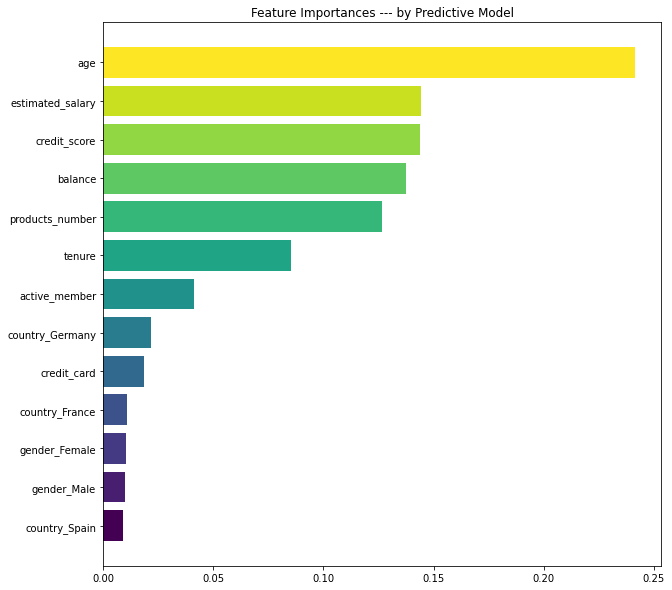

In [18]:
#checking feature importances (Gini Importance)

feat_importances = pd.Series(rf.feature_importances_, index=train.drop('churn', axis=1).columns)
sorted_importances = feat_importances.sort_values()

plt.figure(figsize=(10, 10))

# Generate a list of colors
num_features = len(sorted_importances)
colors = plt.cm.viridis(np.linspace(0, 1, num_features))  # Use a nice colormap

# Plot the bar chart with different colors
plt.barh(sorted_importances.index, sorted_importances.values, color=colors)
plt.title('Feature Importances --- by Predictive Model')

plt.savefig("feature_importance.png", bbox_inches="tight") 
plt.show()



In [19]:
feat_importances.sort_values(ascending=False)

age                 0.241244
estimated_salary    0.144259
credit_score        0.143630
balance             0.137513
products_number     0.126740
tenure              0.085335
active_member       0.041005
country_Germany     0.021892
credit_card         0.018355
country_France      0.010619
gender_Female       0.010262
gender_Male         0.010109
country_Spain       0.009038
dtype: float64

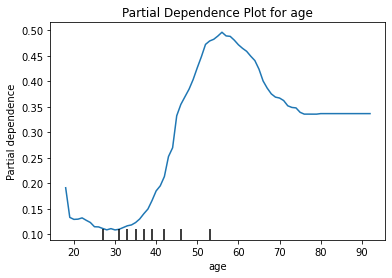

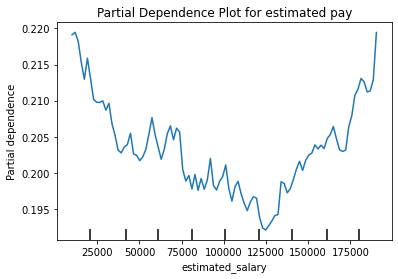

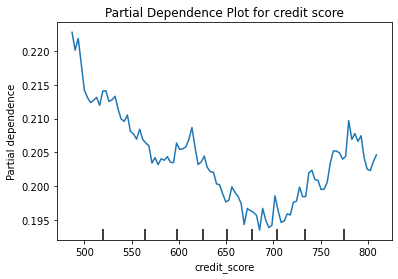

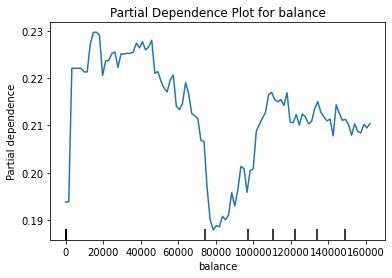

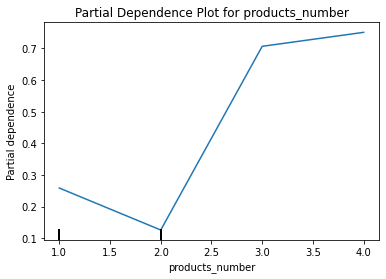

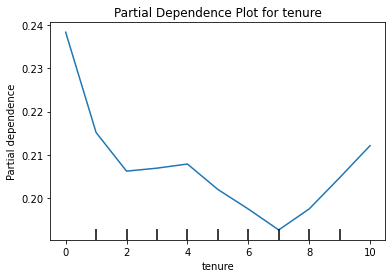

In [20]:
X_train = train.drop('churn', axis=1)


# Partial Dependence PLots for the top six features (out of 10 features) by feature importances from the model
# top six features: age, estimated_salary, credit_score, balance, products_number, tenure

PartialDependenceDisplay.from_estimator(rf, X_train, ['age'])
plt.title('Partial Dependence Plot for age')
plt.show()

PartialDependenceDisplay.from_estimator(rf, X_train, ['estimated_salary'])
plt.title('Partial Dependence Plot for estimated pay')
plt.show()

PartialDependenceDisplay.from_estimator(rf, X_train, ['credit_score'])
plt.title('Partial Dependence Plot for credit score')
plt.show()

PartialDependenceDisplay.from_estimator(rf, X_train, ['balance'])
plt.title('Partial Dependence Plot for balance')
plt.show()

PartialDependenceDisplay.from_estimator(rf, X_train, ['products_number'])
plt.title('Partial Dependence Plot for products_number')
plt.show()

PartialDependenceDisplay.from_estimator(rf, X_train, ['tenure'])
plt.title('Partial Dependence Plot for tenure')
plt.show()


## Data Analysis and Business Recommendations

Based on the analysis of customer data and the development of a predictive churn model, several key factors have been identified as significantly impacting customer attrition. To mitigate churn and enhance customer retention, a series of targeted business recommendations are presented below, categorized by the influential features. These recommendations aim to provide actionable strategies for marketing, product development, and financial planning, ultimately improving customer satisfaction and profitability.

**Below are analysis results and business recommendations by feature.**

**1. Age**

* **Analysis Results:**
    * Age emerged as the most significant predictor of churn.
    * The churn rate is notably higher among customers in the 45-65 age bracket.
* **Recommendations:**
    * **Marketing:** Develop targeted campaigns that resonate with the specific needs and life stage of this demographic. Highlight products and services relevant to retirement planning, wealth management, and family finances. Use communication channels they prefer.
    * **Product:** Tailor product features and user experience to this age group. Consider offering specialized products or services, such as retirement accounts or wealth management tools.

---

**2. Salary**

* **Analysis Results:**
    * Salary is the second most crucial factor.
    * Churn is higher for both low-income and high-income customers, while it's relatively lower for those in the mid-range (75k-150k).
* **Recommendations:**
    * **Marketing:** Segment marketing campaigns based on income levels. For high-income individuals, emphasize premium services and wealth management. For low-income segments, highlight budgeting tools and services that help with financial stability.

---

**3. Credit Score**

* **Analysis Results:**
    * Credit score is the third most important.
    * Churn is higher for customers with extreme credit scores (very low or very high) compared to those in the common range (650-750).
* **Recommendations:**
    * **Marketing:** Educate customers on the importance of credit scores. Provide resources for credit improvement. Target low-score customers with relevant products.
    * **Finance:** Use credit score data for risk assessment in lending and other financial products.

---

**4. Balance**

* **Analysis Results:**
    * Balance is the fourth most important.
    * Churn is higher for customers with very low or very high balances, while it's lower for those in the middle range (~80k-100k).
* **Recommendations:**
    * **Product:** Offer specialized products or services based on customer balance ranges. Provide tailored financial advice and solutions.
    * **Finance:** Use balance data for risk assessment in financial product offerings.

---

**5. Number of Products**

* **Analysis Results:**
    * Customers with more than two products have a significantly higher churn rate.
* **Recommendations:**
    * **Product:** Implement product bundling or tiered services to enhance value for customers with multiple products. Focus on improving the user experience for those with many products.

---

**6. Tenure**

* **Analysis Results:**
    * Tenure shows a U-shaped pattern in relation to churn. Churn rates are highest for customers with very short tenures (new customers) and very long tenures (established customers), while they are lowest for those with a mid-range tenure of approximately 5-8 years.
* **Recommendations:**
    * **Product:** Develop onboarding programs to improve retention for new customers. Implement targeted engagement strategies for customers approaching and exceeding 8 years of tenure. Offer loyalty programs or exclusive benefits to long-term customers. Offer loyalty programs or exclusive benefits to long-term customers. Analyze the reasons behind high churn in new customers, and high tenure customers. Analyze what is working well for the middle tenure group.
      
---

**7. Active Member**

* **Analysis Results:**
    * Active members have a lower churn rate, as expected.
* **Recommendations:**
    * **Product:** Further incentivize active membership through exclusive benefits, rewards, and personalized services.

---

**8. Credit Card Ownership**

* **Analysis Results:**
    * While a majority of customers own credit cards, the churn rate for credit card holders is only slightly lower.
* **Recommendations:**
    * **Product:** Enhance the value proposition of credit cards by improving rewards, benefits, and user experience.

---

**9. Country**

* **Analysis Results:**
    * German customers have a significantly higher churn rate compared to French and Spanish customers.
* **Recommendations:**
    * **Marketing:** Conduct thorough research to understand the reasons for high churn in Germany. Implement targeted retention campaigns and address specific concerns.

---

**10. Gender**

* **Analysis Results:**
    * Female customers have a higher churn rate than male customers.
* **Recommendations:**
    * **Marketing:** Develop marketing campaigns tailored to female customers, addressing their specific financial needs and concerns.
